In [37]:
# intial imports
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

# US Border Activity

We use a dataset that contains monthly temporal data for crossings into the US from both the US-Canadian border, and the US-Mexican border. In this notebook we will apply several data analysis approaches to answer questions regarding the data.

In [38]:
replace_dict = {'Border':{'US-Canada Border':'CA','US-Mexico Border':'MX'}}

border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')

border_crossing_full = border_crossing_full.replace(replace_dict)
border_crossing_full[['Month','Year']] = border_crossing_full['Date'].str.split(" ",expand=True)
border_crossing_full = border_crossing_full.drop(['Port Name','Point','Date'],axis=1)
coordless_border_crossing = border_crossing_full.drop(['Latitude','Longitude'],axis=1)

In [39]:
border_crossing_full.shape

(380467, 9)

In [4]:
#groupedState = coordless_border_crossing.groupby('State').agg('first')
#groupedState.head(15)

## 1. Comparing Canadian and Mexican entries


<ipython-input-40-925a19cd096a>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


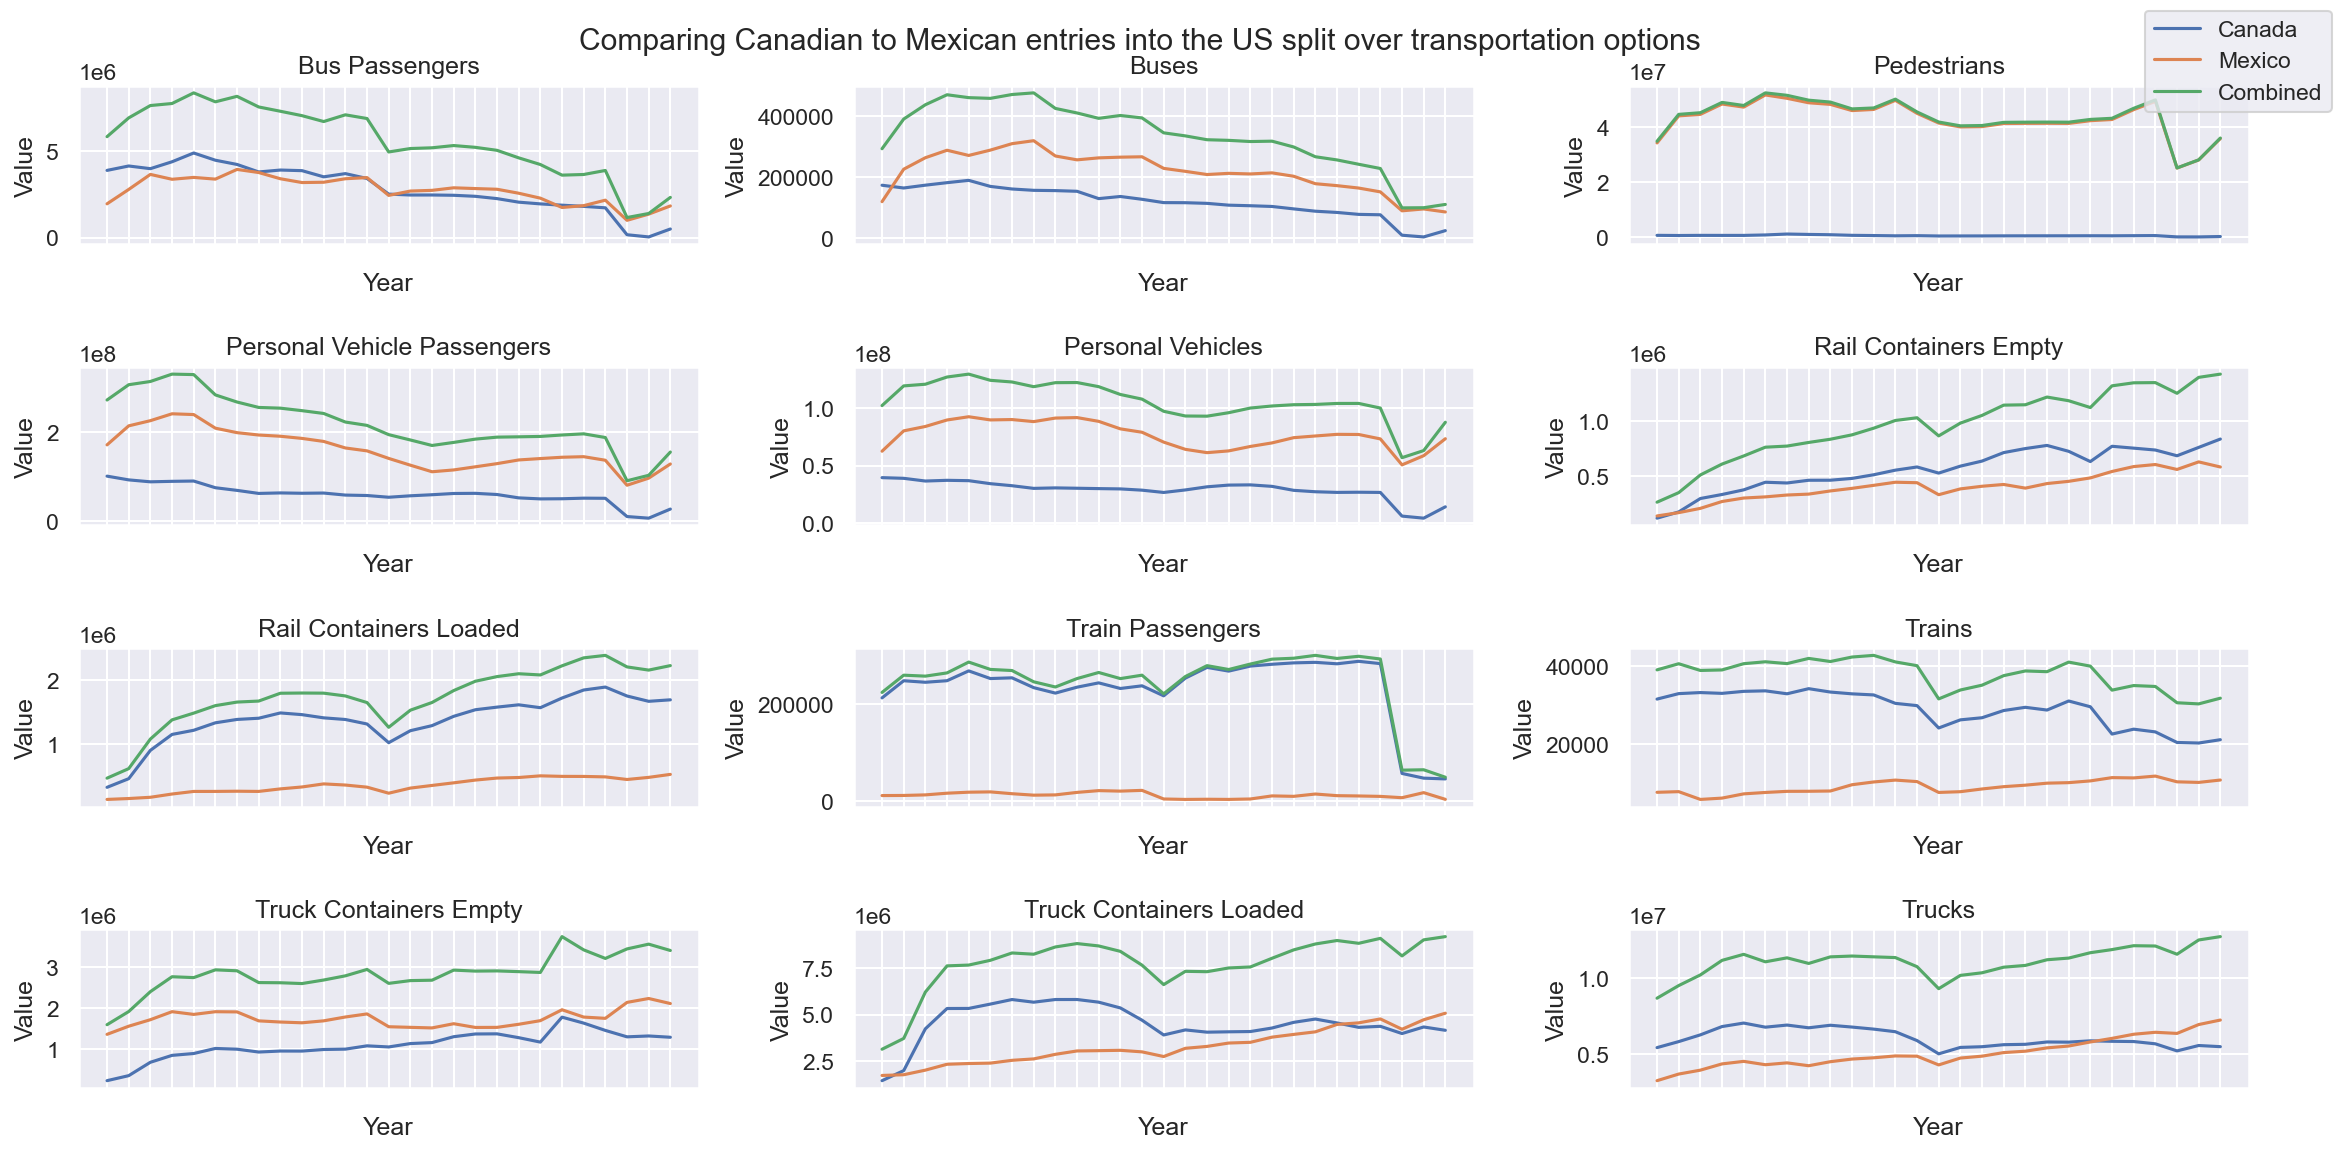

In [40]:
canadafilter = border_crossing_full['Border'] == 'CA'
mexicofilter = ~canadafilter

canadacrossings = border_crossing_full.loc[canadafilter]
mexicocrossings = border_crossing_full.loc[mexicofilter]

border_crossing_years = border_crossing_full[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
canada_activity = canadacrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')
mexico_activity = mexicocrossings[['Year','Measure','Value']].groupby(['Year','Measure']).agg(sum).reset_index(level=['Measure']).drop(index='2023')

fig, axs = plt.subplots(nrows=4,ncols=3)
fig.tight_layout(pad=3)
ax = sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Canada')
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Mexico').title.set_text('Bus Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Bus Passengers'],x='Year',y='Value',ax=axs[0,0],label='Combined')
ax.set_xticklabels([])  
ax.get_legend().remove()
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1]).title.set_text('Buses')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Buses'],x='Year',y='Value',ax=axs[0,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2]).title.set_text('Pedestrians')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Pedestrians'],x='Year',y='Value',ax=axs[0,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0]).title.set_text('Personal Vehicle Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicle Passengers'],x='Year',y='Value',ax=axs[1,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1]).title.set_text('Personal Vehicles')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Personal Vehicles'],x='Year',y='Value',ax=axs[1,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2]).title.set_text('Rail Containers Empty')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Empty'],x='Year',y='Value',ax=axs[1,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0]).title.set_text('Rail Containers Loaded')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Rail Containers Loaded'],x='Year',y='Value',ax=axs[2,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1]).title.set_text('Train Passengers')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Train Passengers'],x='Year',y='Value',ax=axs[2,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2]).title.set_text('Trains')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Trains'],x='Year',y='Value',ax=axs[2,2])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0]).title.set_text('Truck Containers Empty')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Empty'],x='Year',y='Value',ax=axs[3,0])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1]).title.set_text('Truck Containers Loaded')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Truck Containers Loaded'],x='Year',y='Value',ax=axs[3,1])
sns.lineplot(data=canada_activity.loc[canada_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).set_xticklabels([])
sns.lineplot(data=mexico_activity.loc[mexico_activity['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2]).title.set_text('Trucks')
sns.lineplot(data=border_crossing_years.loc[border_crossing_years['Measure'] == 'Trucks'],x='Year',y='Value',ax=axs[3,2])
fig.legend()
fig.suptitle('Comparing Canadian to Mexican entries into the US split over transportation options')
fig.show()




*** Observations Question 1 ***

maybe a plot per transportation mode for visuals

### 1.1. How does the mode of transportation change over time (from both countries)?


In [6]:
### CODE HERE

*** Observations Question 1.5 ***
<br>
Decline in the use of buses, massive decline in use of trains

## 2. How did the number of entries vary since 1996? How will they change in the future?

### 2.1. Analysis of number of entries's evolution since 1996 til now (per month)

In [65]:
# grouping the number of entries per month
border_crossing_full = pd.read_csv('data/Border_Crossing_Entry_Data.csv')
border_crossing_monthly = border_crossing_full.groupby('Date').agg(sum)
border_crossing_monthly['date'] = border_crossing_monthly.index
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,Apr 1996
Apr 1997,3041976,38632051,54247.92,-123111.096,Apr 1997
Apr 1998,3041976,42047792,54247.92,-123111.096,Apr 1998
Apr 1999,3041976,43042565,54247.92,-123111.096,Apr 1999
Apr 2000,3041976,44639294,54247.92,-123111.096,Apr 2000


In [66]:
# preparing the plot
for i in range(0, border_crossing_monthly['date'].shape[0]):
    month, year = border_crossing_monthly['date'].iloc[i].split(" ")
    for j in range(0, 12):
        if month=="Jan":
            month = 1
        if month=="Feb":
            month = 2
        if month=="Mar":
            month = 3
        if month=="Apr":
            month = 4
        if month=="May":
            month = 5
        if month=="Jun":
            month = 6
        if month=="Jul":
            month = 7
        if month=="Aug":
            month = 8
        if month=="Sep":
            month = 9
        if month=="Oct":
            month = 10
        if month=="Nov":
            month = 11
        if month=="Dec":
            month = 12
    date = (int(year)-1996)*12 + month # indexed monthly date 
    border_crossing_monthly['date'].iloc[i] = date
        
border_crossing_monthly.head()

C:\Users\roman\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Apr 1996,3041976,35690321,54247.92,-123111.096,4
Apr 1997,3041976,38632051,54247.92,-123111.096,16
Apr 1998,3041976,42047792,54247.92,-123111.096,28
Apr 1999,3041976,43042565,54247.92,-123111.096,40
Apr 2000,3041976,44639294,54247.92,-123111.096,52


In [67]:
# re-ordering the monthly data in the chronological order
border_crossing_monthly = border_crossing_monthly.sort_values(by=['date'], ascending=True)
border_crossing_monthly.head()

,Port Code,Value,Latitude,Longitude,date
Date,,,,,
Jan 1996,3041976,32550342,54247.92,-123111.096,1
Feb 1996,3041976,32212625,54247.92,-123111.096,2
Mar 1996,3041976,35509073,54247.92,-123111.096,3
Apr 1996,3041976,35690321,54247.92,-123111.096,4
May 1996,3041976,37644486,54247.92,-123111.096,5


In [68]:
border_crossing_monthly.index

Index(['Jan 1996', 'Feb 1996', 'Mar 1996', 'Apr 1996', 'May 1996', 'Jun 1996',
       'Jul 1996', 'Aug 1996', 'Sep 1996', 'Oct 1996',
       ...
       'Apr 2022', 'May 2022', 'Jun 2022', 'Jul 2022', 'Aug 2022', 'Sep 2022',
       'Oct 2022', 'Nov 2022', 'Dec 2022', 'Jan 2023'],
      dtype='object', name='Date', length=325)

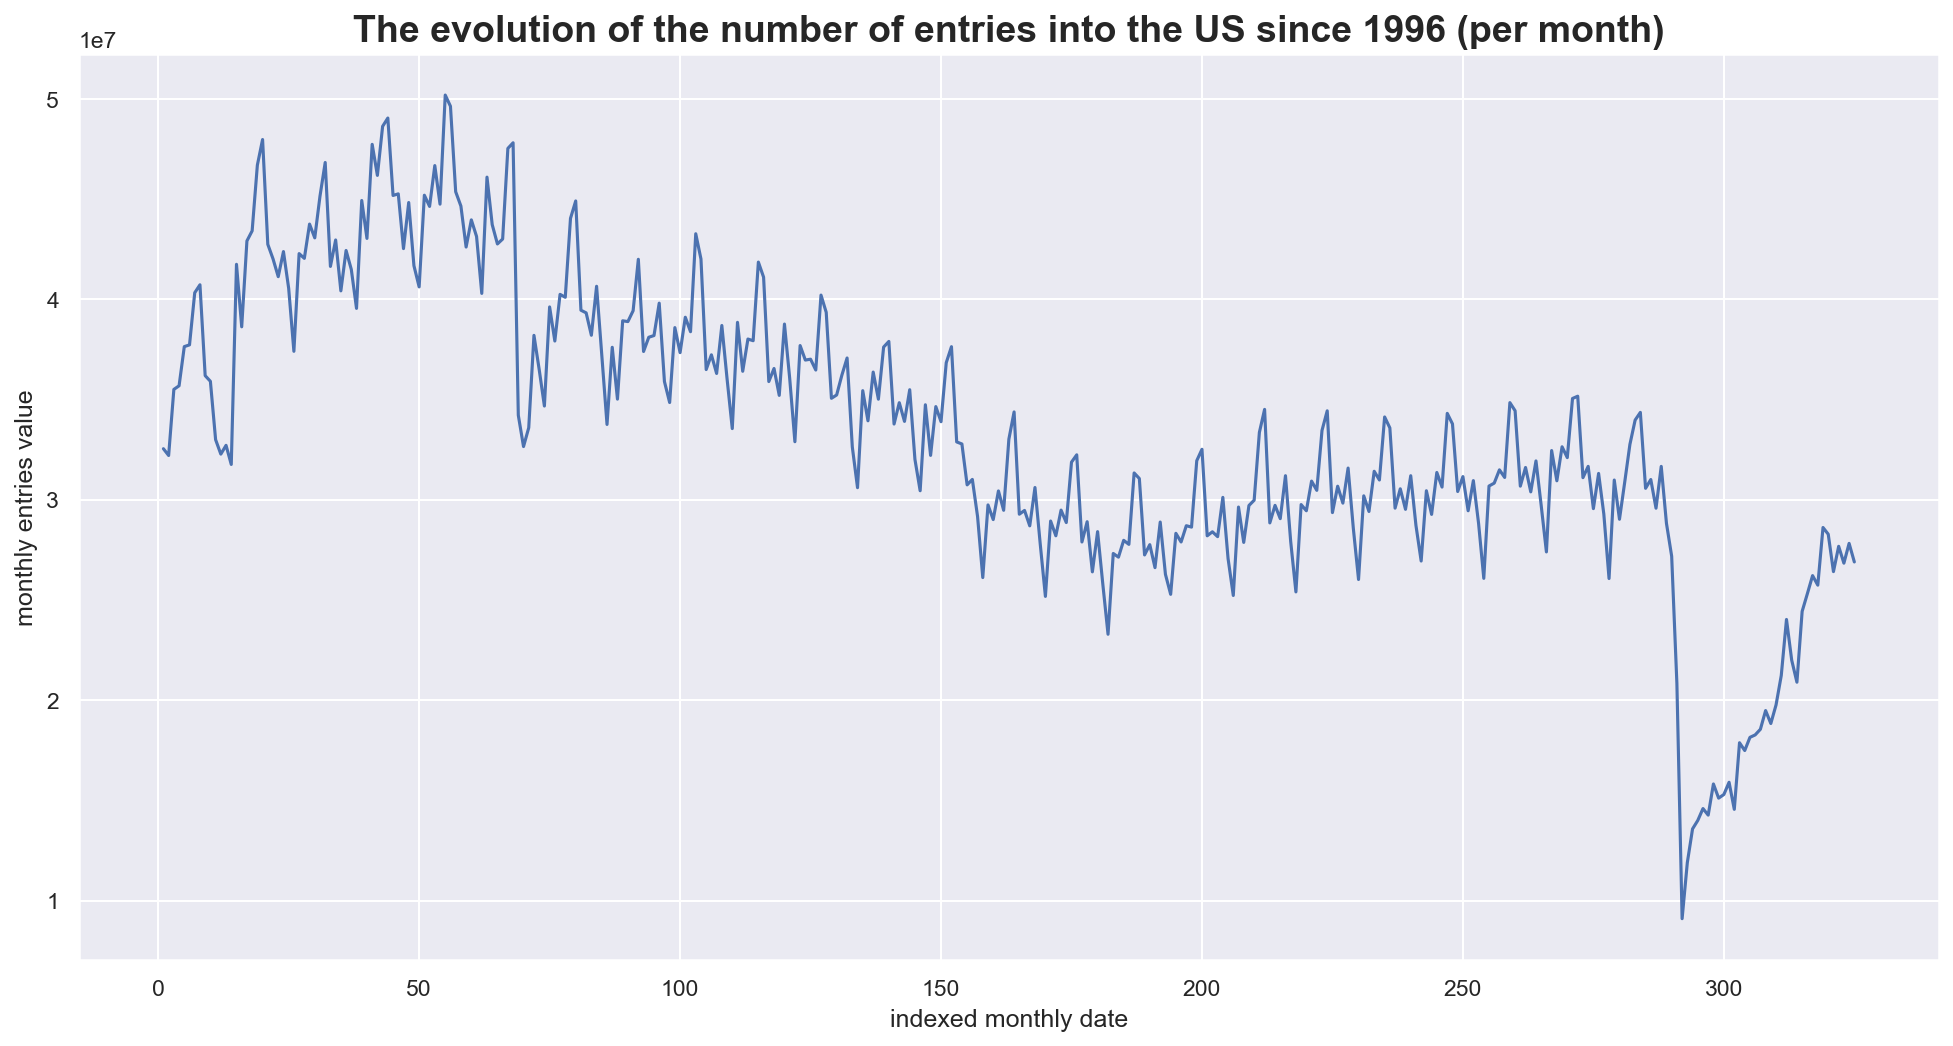

In [121]:
sns.lineplot(data=border_crossing_monthly, x='date', y='Value')
plt.title(label='The evolution of the number of entries into the US since 1996 (per month)', weight='bold').set_fontsize('18')
plt.xlabel('indexed monthly date')
plt.ylabel('monthly entries value');

*** Observations ***

general trend: decreasing (with seasonality)
3 trend changing points (2001, 2010, 2020)
slight increase in beginning till 2001

### 2.2. Forecasting the monthly number of entries 

The observations seem to not be independent from the plot above. It looks like there is more structure in the data such as a trend and a seasonality. Moreover, it also seems that there are external events that might affect the number of entries (we will cover them in question 3).

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

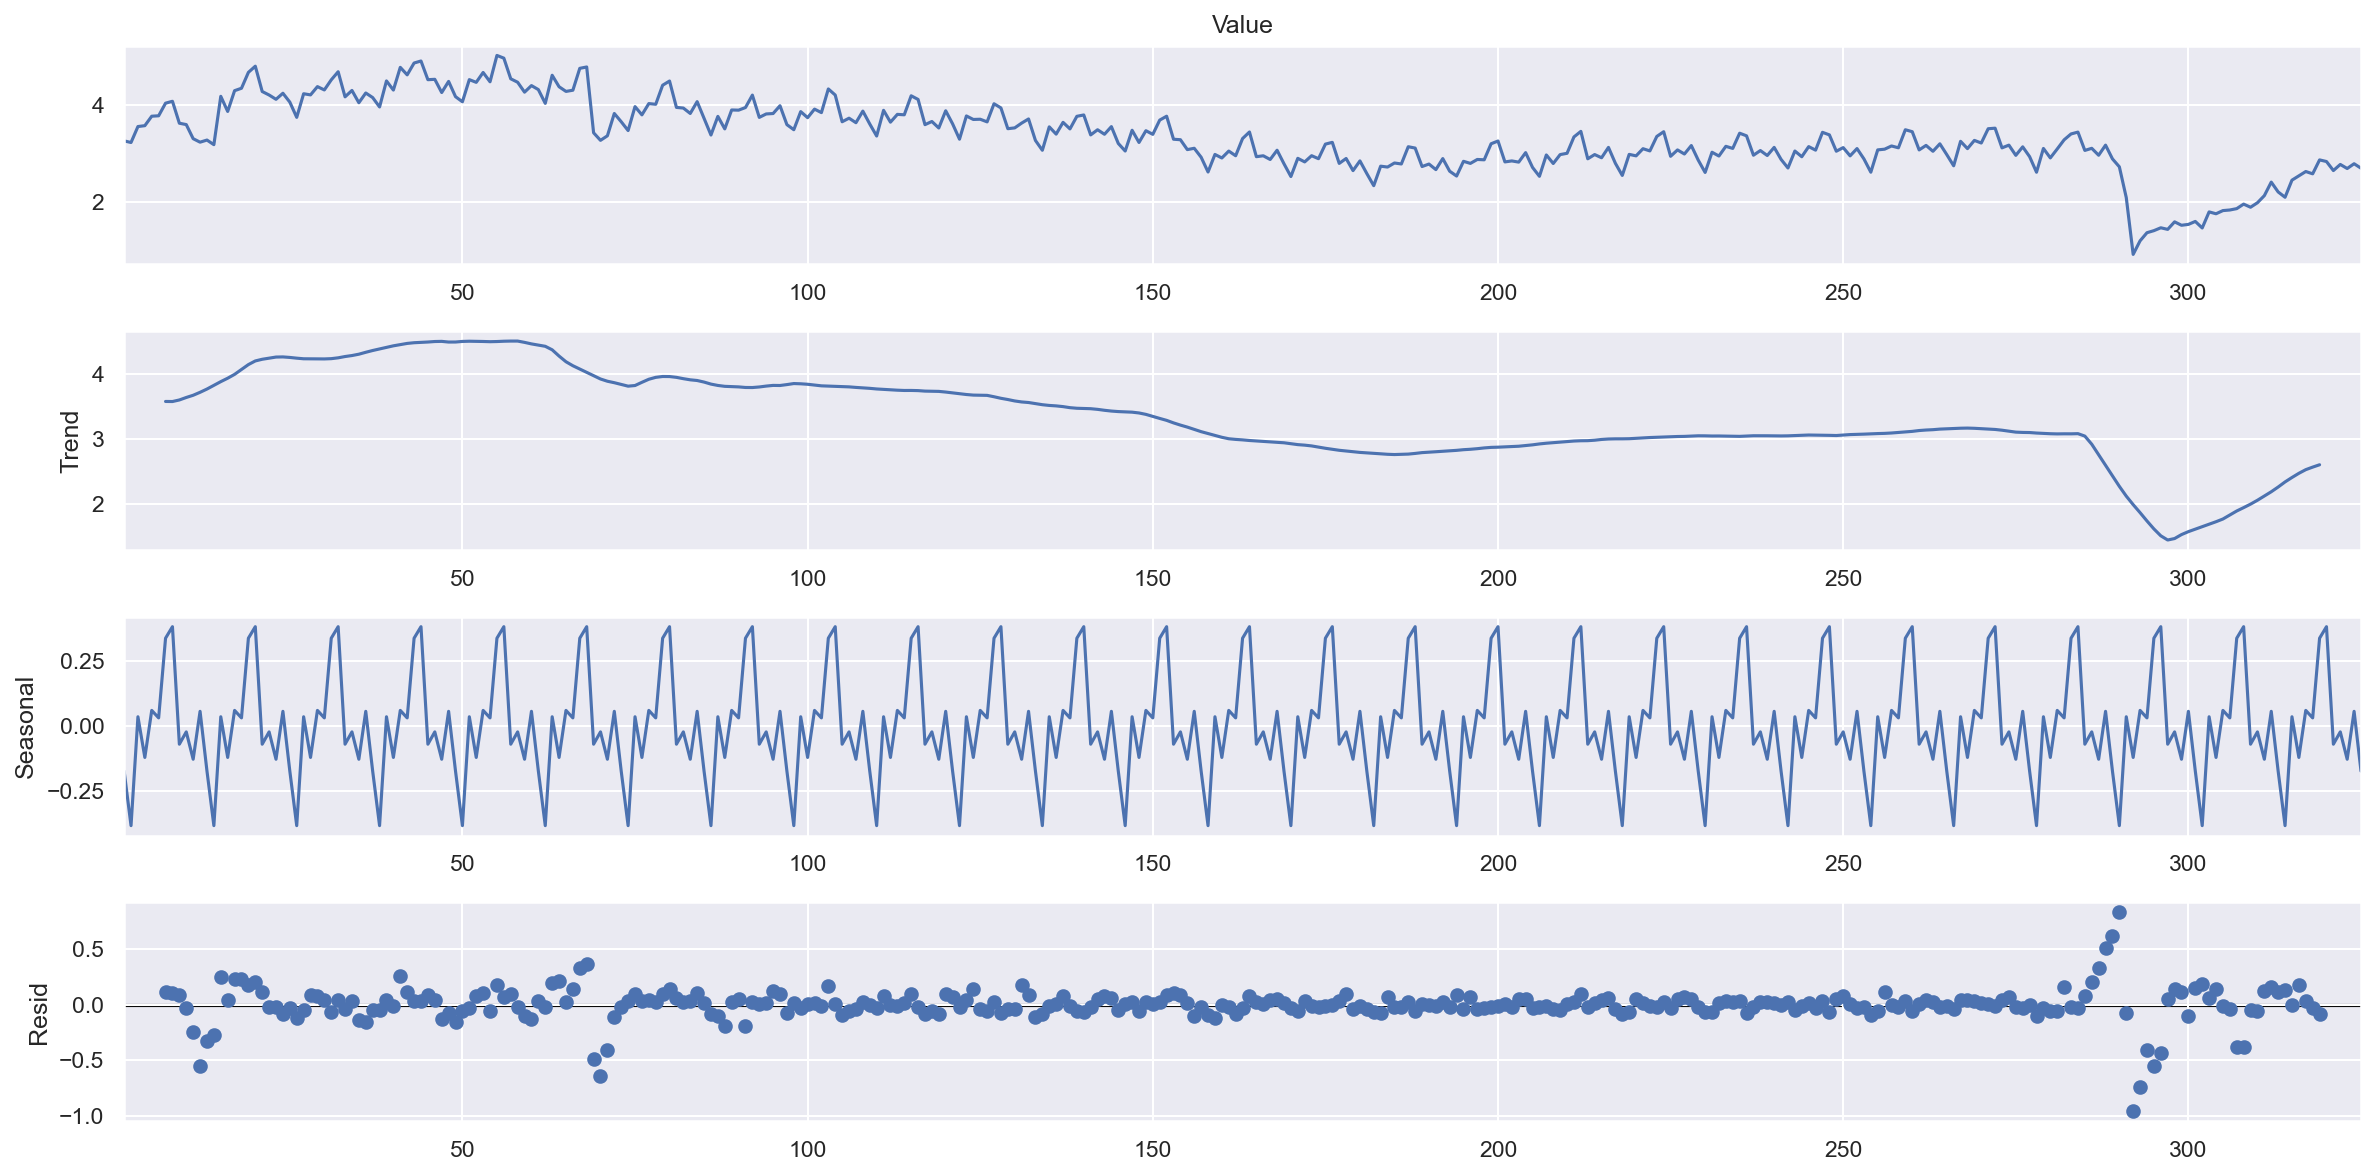

In [79]:
decompfreq = 12
model = 'additive'
 
decomposition = seasonal_decompose(
    (border_crossing_monthly.set_index("date").Value/1e7).interpolate('linear'),
    period = decompfreq,
    model=model)

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(16, 8)

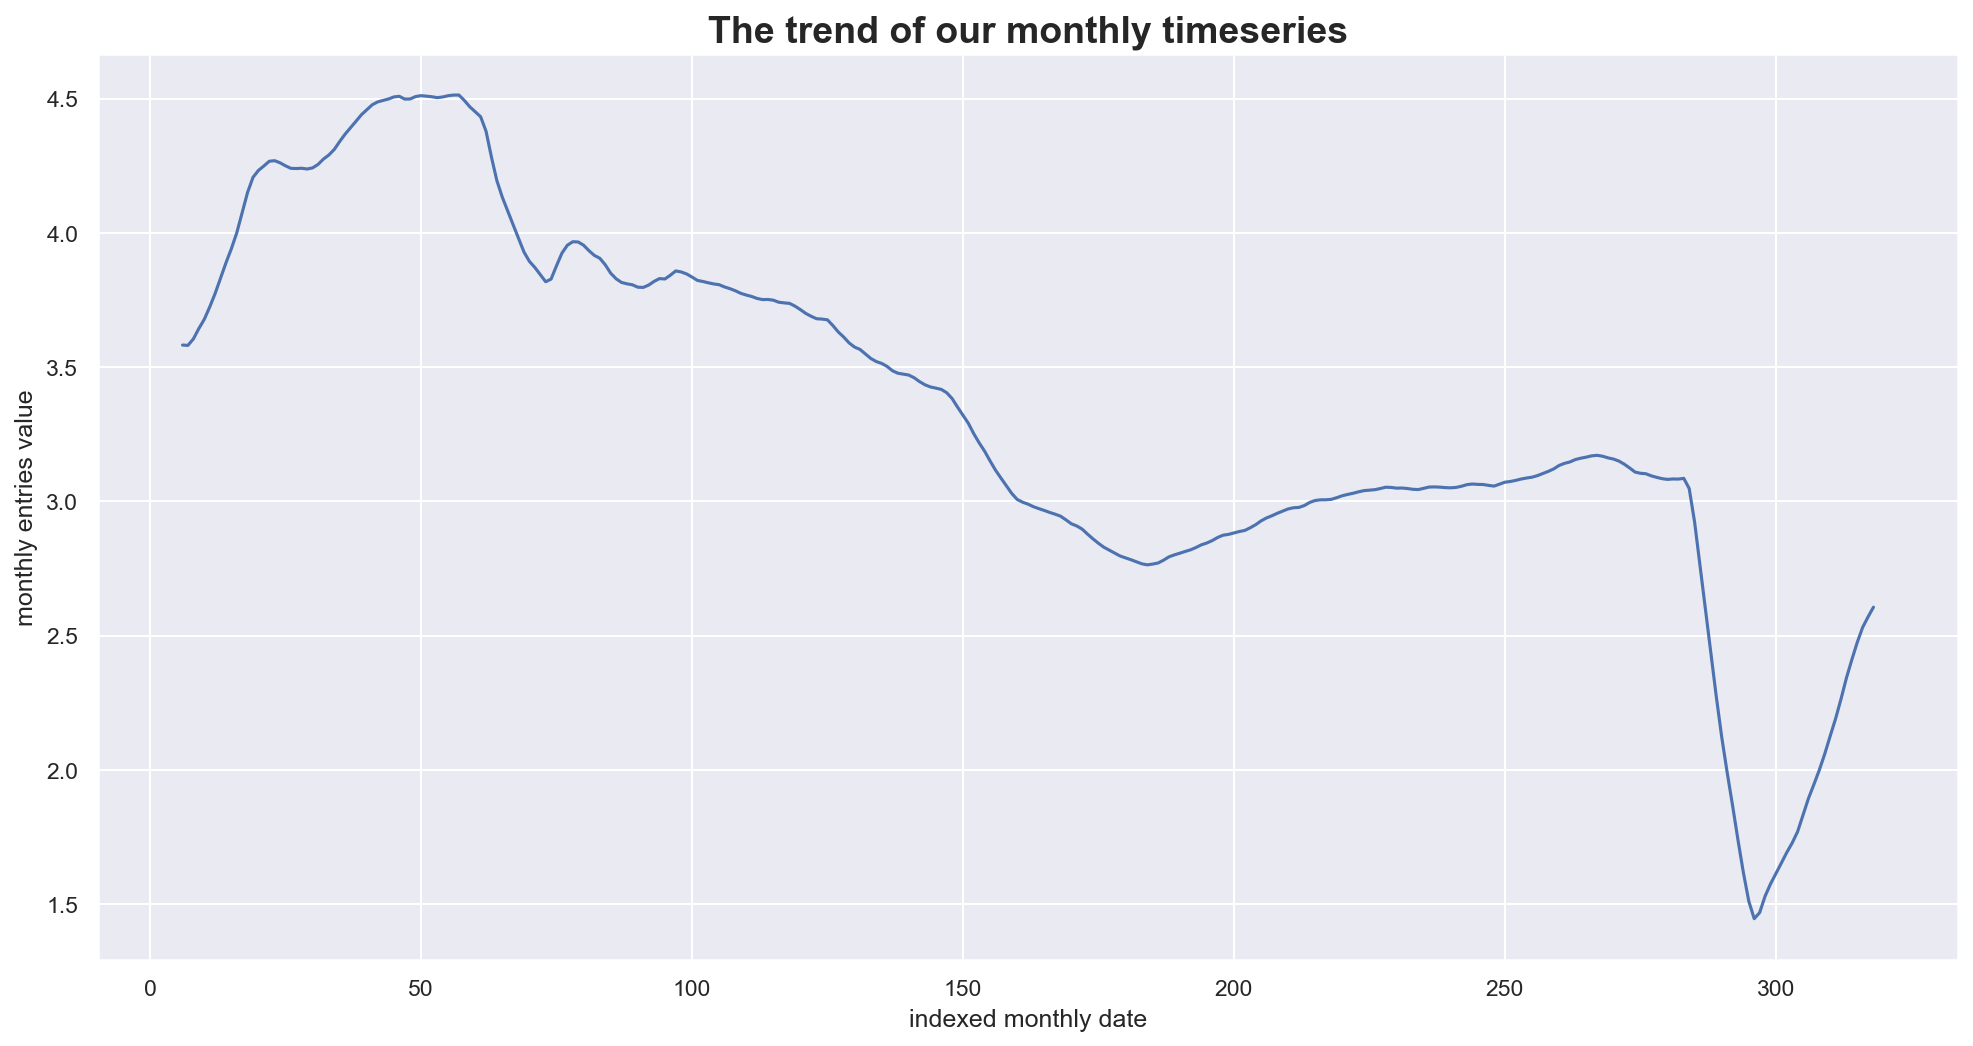

In [120]:
plt.plot(trend.values)
plt.title(label='The trend of our monthly timeseries', weight='bold').set_fontsize('18')
plt.xlabel('indexed monthly date')
plt.ylabel('monthly entries value');

We check if our timeseries is stationary

visually

In [122]:
#function for the visual check of rolling statistics
def visual_check(df, value, seasons, save_to=None):
    #double check this is correct!
    seasonal_mean = df.set_index("date").rolling(seasons).mean().reset_index()
    seasonal_std = df.set_index("date").rolling(seasons).std().reset_index()

    fig, ax = plt.subplots(figsize=(18,6))
    df.plot(x="date", y=value, ax=ax, label="observed", c='lightgrey')
    seasonal_mean.plot(x="date", y=value, ax=ax, label="seasonal (rolling) mean", c='blue')
    seasonal_std.plot(x="date", y=value, ax=ax, label="seasonal (rolling) std", c='green')

    plt.legend(loc='best')
    plt.title('Seasonal Mean & Standard Deviation')
    plt.xlabel('index monthly date')
    plt.ylabel('monthly entries value')
    
    if save_to is not None:
        plt.savefig(save_to)
    plt.show();

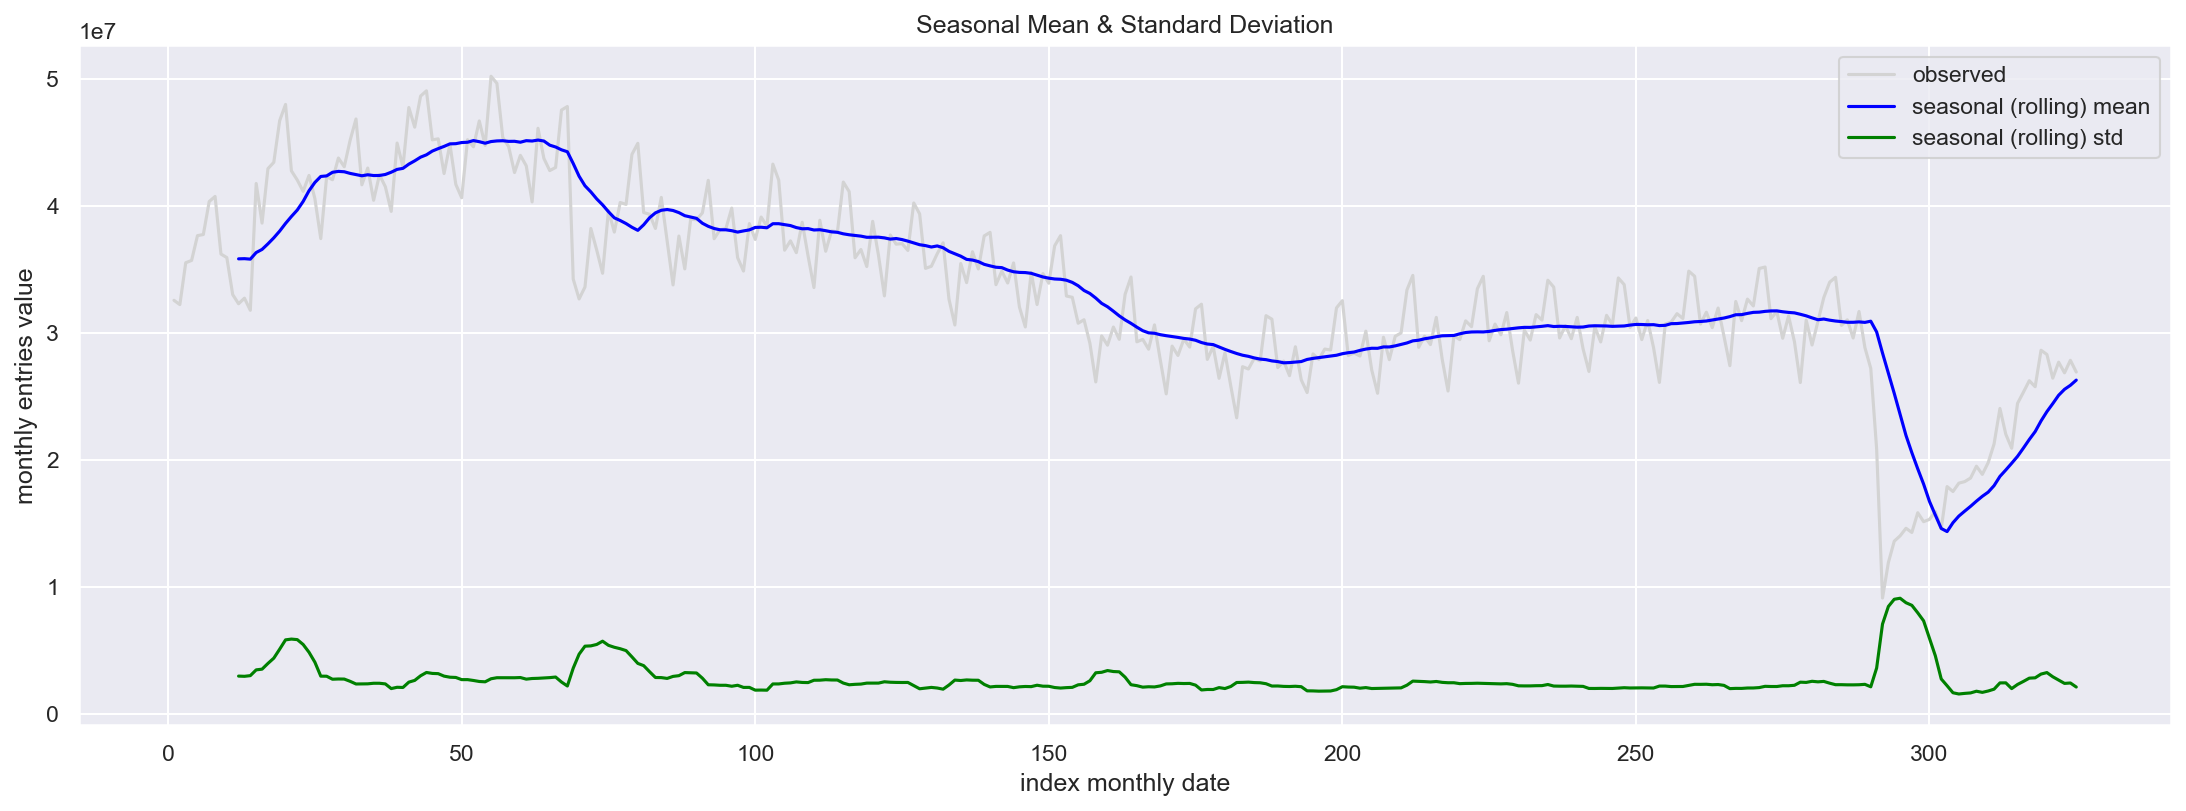

In [123]:
visual_check(border_crossing_monthly, "Value", decompfreq)

statistically (ADF unit root test)

In [103]:
from statsmodels.tsa.stattools import adfuller

def is_stationary_with_adf(data, significance_level=0.05):
    """Decide if the given time series is stationary using ADF test."""
    test = adfuller(data, regression='c', autolag='BIC')
    p_value = test[1]
    print("ADF p-value: {:0.5f}".format(p_value))
    return p_value < significance_level

In [104]:
significance_level = 0.05
print("Significance Level: {}%".format(100 * significance_level), '\n')

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(border_crossing_monthly.Value.values, significance_level) else "no"), '\n')

print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(residual.dropna(), significance_level) else "no"), '\n')

Significance Level: 5.0% 

ADF p-value: 0.36511
Stationary by ADF: no 

ADF p-value: 0.00000
Stationary by ADF: yes 



The test do not pass for our raw values as expected. However, note that the stationary test passes for the residuals.

we check with the correlogram plot

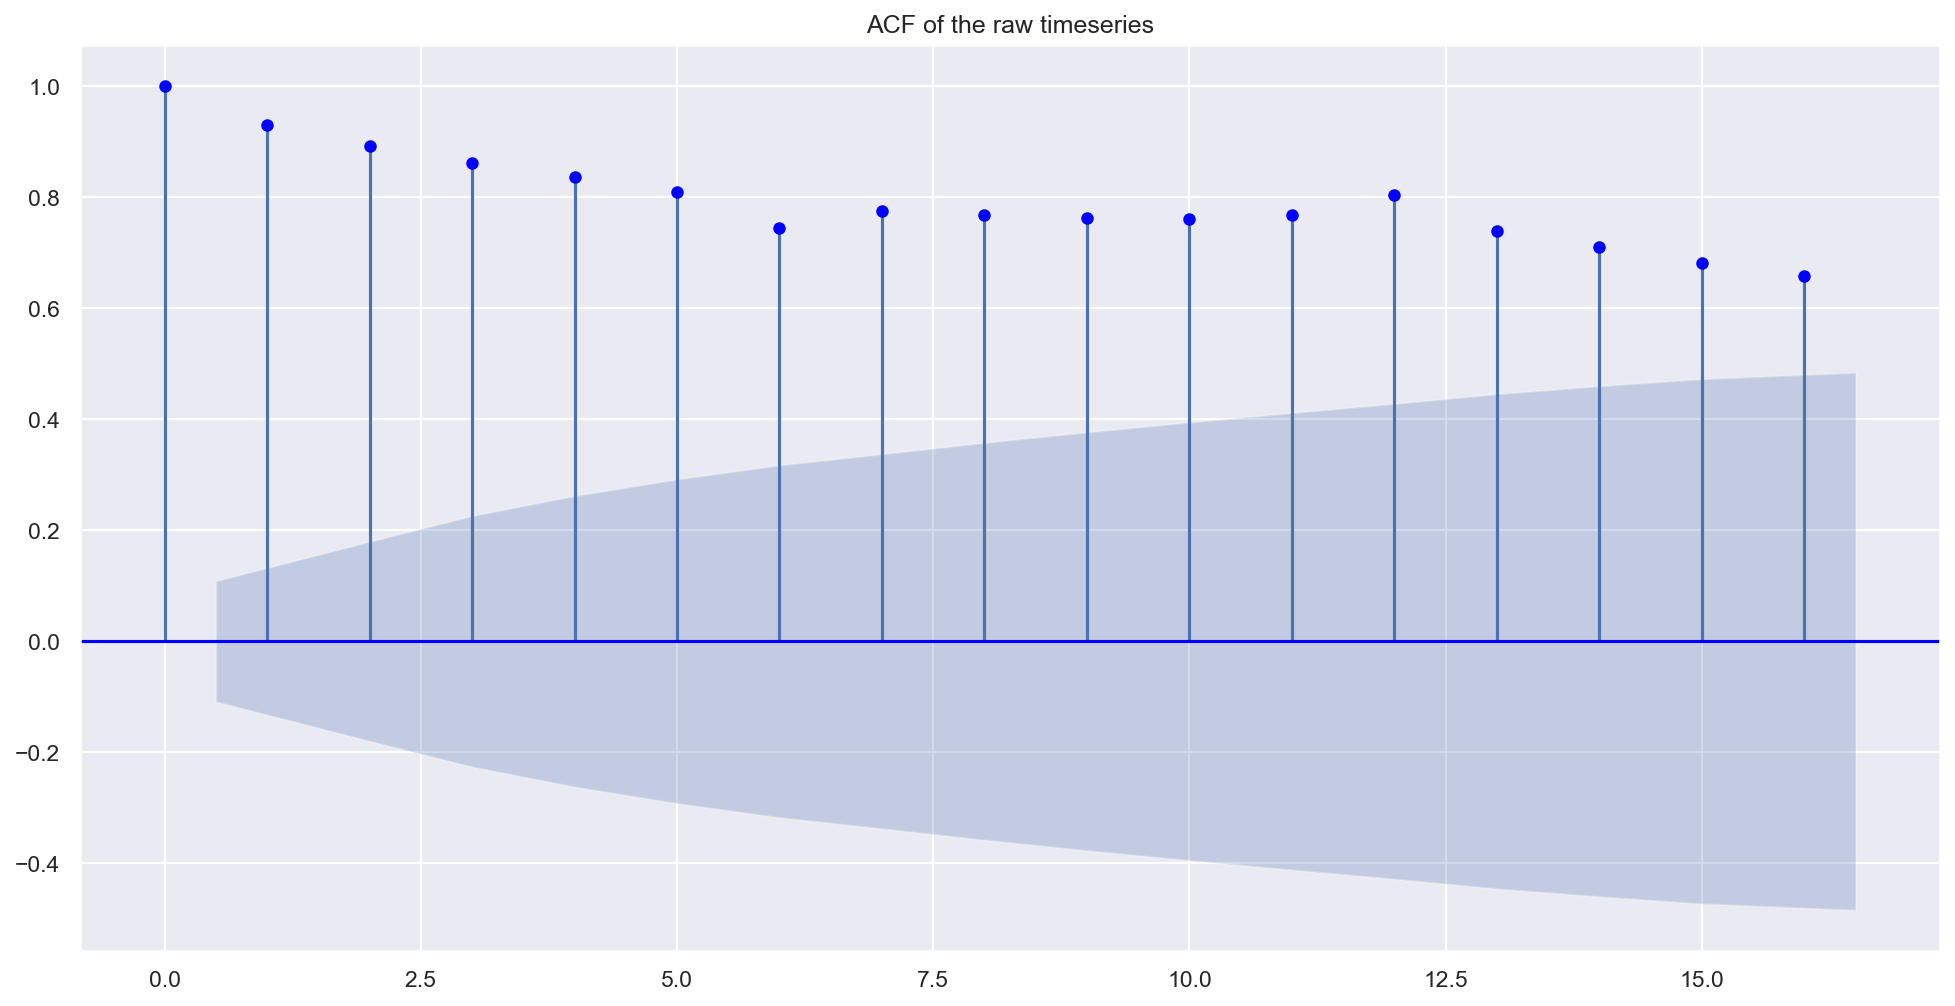

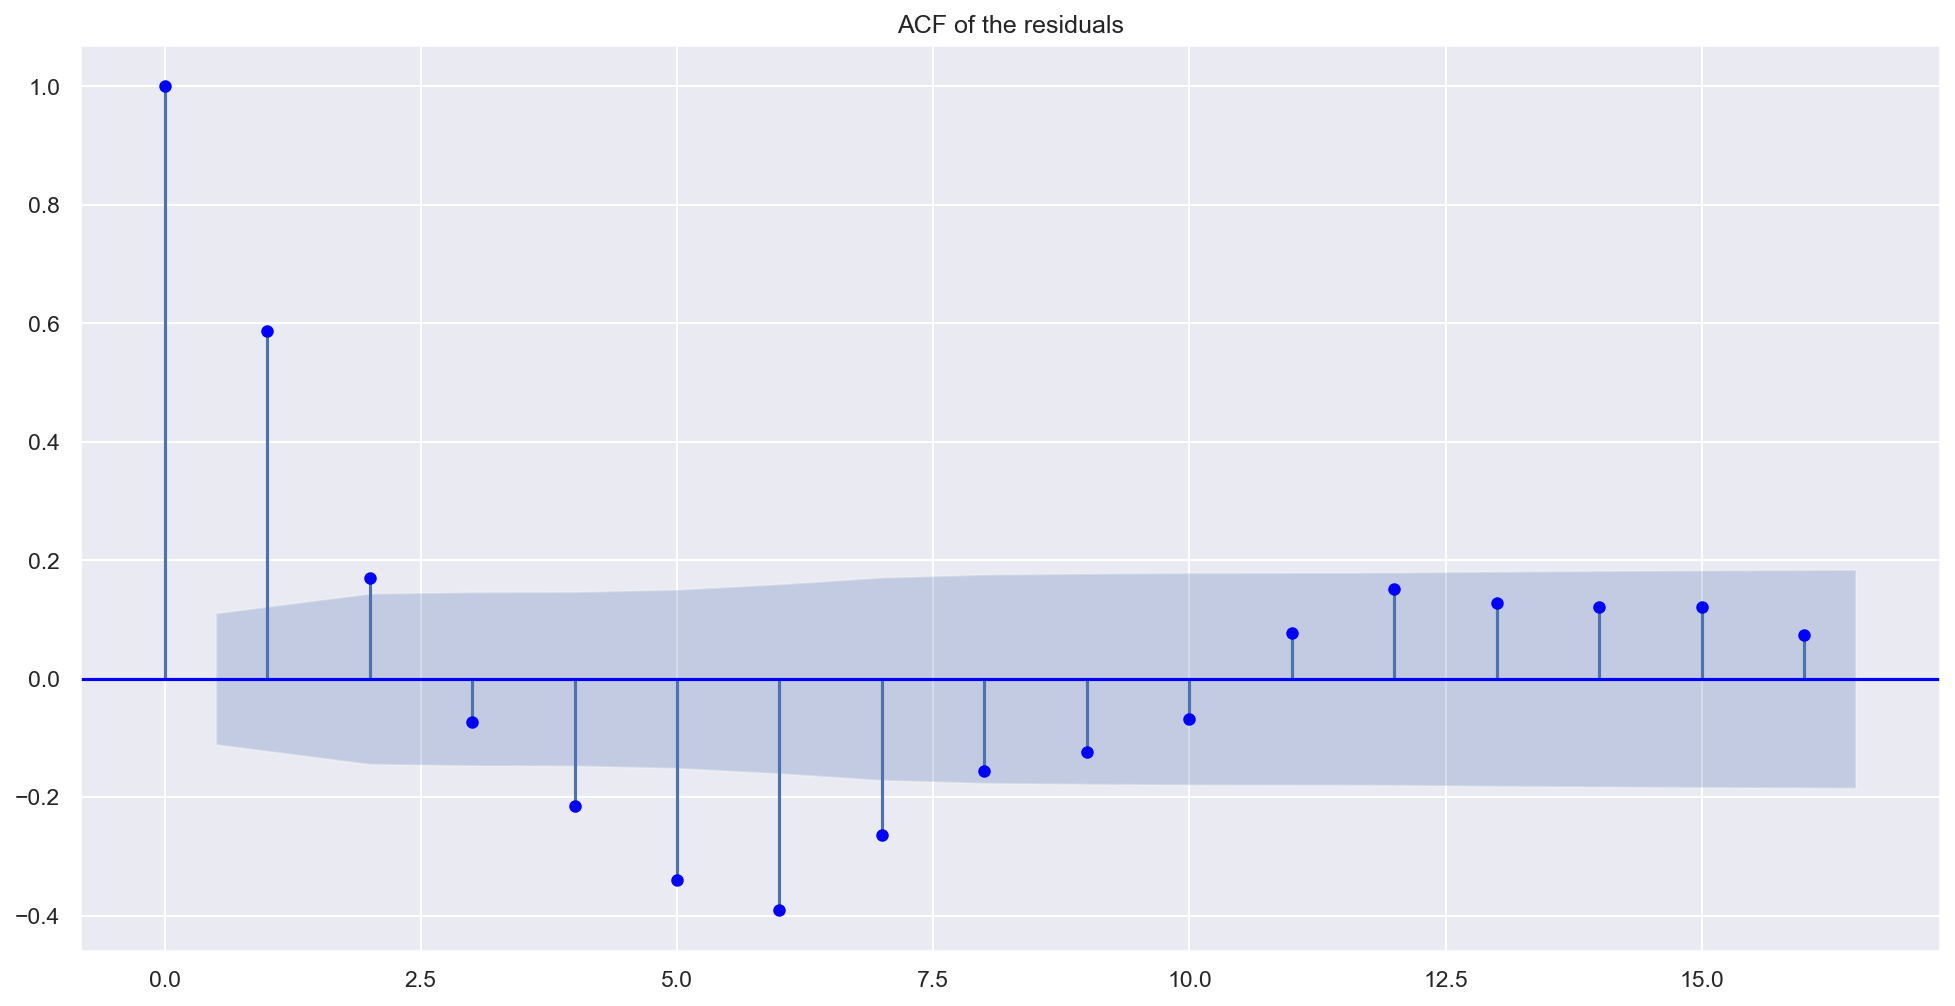

In [110]:
from statsmodels.graphics.tsaplots import plot_acf#, plot_pacf

fig = plot_acf(border_crossing_monthly.Value, color = "blue", lags=16, title='ACF of the raw timeseries')
fig = plot_acf(residual.dropna(), color = "blue", lags=16, title='ACF of the residuals')

We may conclude that our timeseries is mainly stationary but not as close as a pure random process as we would like.

We apply differencing and smoothing to get closer to stationarity

In [95]:
border_crossing_monthly["difference"] = border_crossing_monthly.Value - border_crossing_monthly.Value.shift(1)
border_crossing_monthly["stationary"] = border_crossing_monthly.difference - border_crossing_monthly.difference.shift(decompfreq)
border_crossing_monthly = border_crossing_monthly.fillna(0)
border_crossing_monthly.head(14)

,Port Code,Value,Latitude,Longitude,date,difference,stationary
Date,,,,,,,
Jan 1996,3041976,32550342,54247.92,-123111.096,1,0.0,0.0
Feb 1996,3041976,32212625,54247.92,-123111.096,2,-337717.0,0.0
Mar 1996,3041976,35509073,54247.92,-123111.096,3,3296448.0,0.0
Apr 1996,3041976,35690321,54247.92,-123111.096,4,181248.0,0.0
May 1996,3041976,37644486,54247.92,-123111.096,5,1954165.0,0.0
Jun 1996,3041976,37731632,54247.92,-123111.096,6,87146.0,0.0
Jul 1996,3041976,40333161,54247.92,-123111.096,7,2601529.0,0.0
Aug 1996,3041976,40728924,54247.92,-123111.096,8,395763.0,0.0
Sep 1996,3041976,36195902,54247.92,-123111.096,9,-4533022.0,0.0


In [96]:
border_crossing_monthly["smooth"] = border_crossing_monthly["stationary"].rolling(window = 20, center = False).mean()
border_crossing_monthly.tail()

,Port Code,Value,Latitude,Longitude,date,difference,stationary,smooth
Date,,,,,,,,
Sep 2022,1824112,26417617,33405.662,-75751.217,321,-1866288.0,-1221449.0,1025018.40
Oct 2022,1793650,27680008,32998.176,-74733.673,322,1262391.0,335178.0,1027178.15
Nov 2022,1759783,26839600,32273.487,-73272.477,323,-840408.0,-2308582.0,428225.75
Dec 2022,1765640,27826488,32197.902,-73370.840,324,986888.0,-1809124.0,-229747.20
Jan 2023,1743648,26900650,31649.624,-72179.658,325,-925838.0,1106290.0,-67371.35


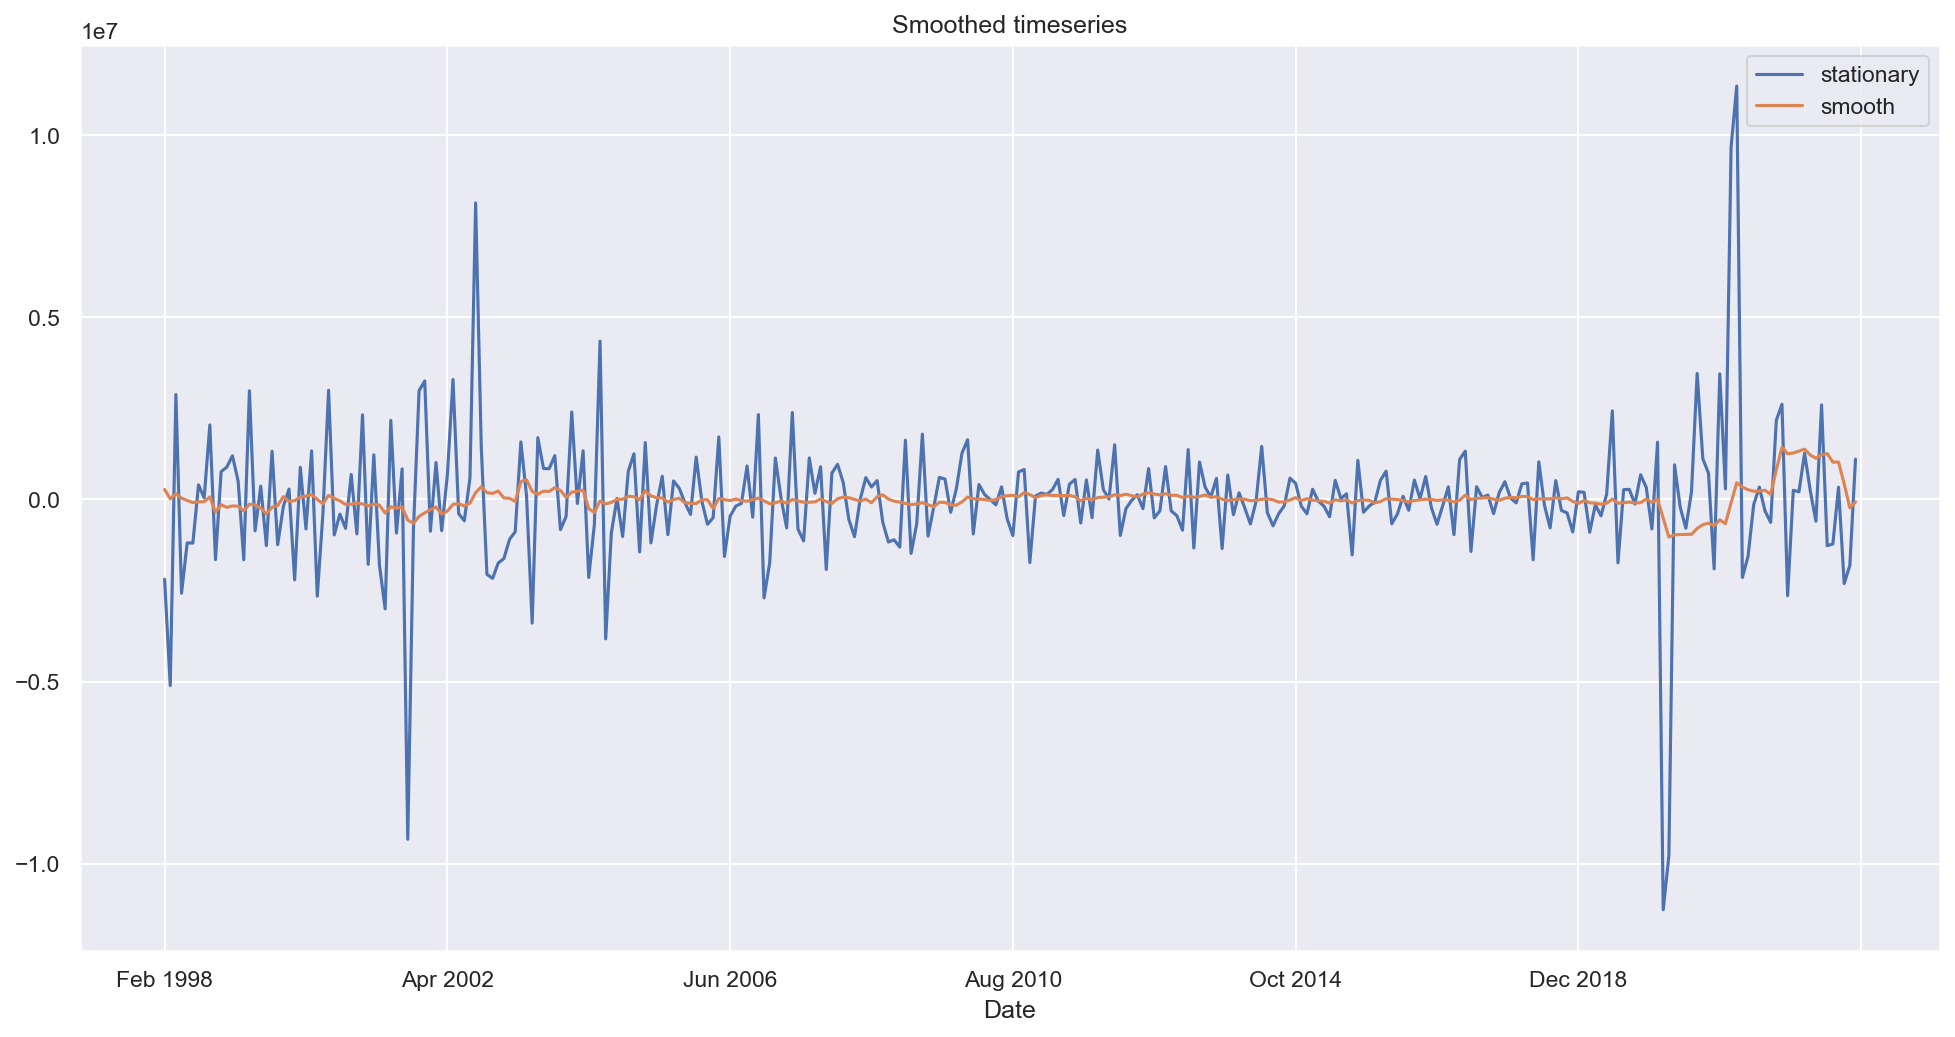

In [113]:
border_crossing_monthly[["stationary", "smooth"]].tail(300).plot(grid = True, title='Smoothed timeseries');

After having differenced our timeseries, we determine good parameters for our autoregressive model

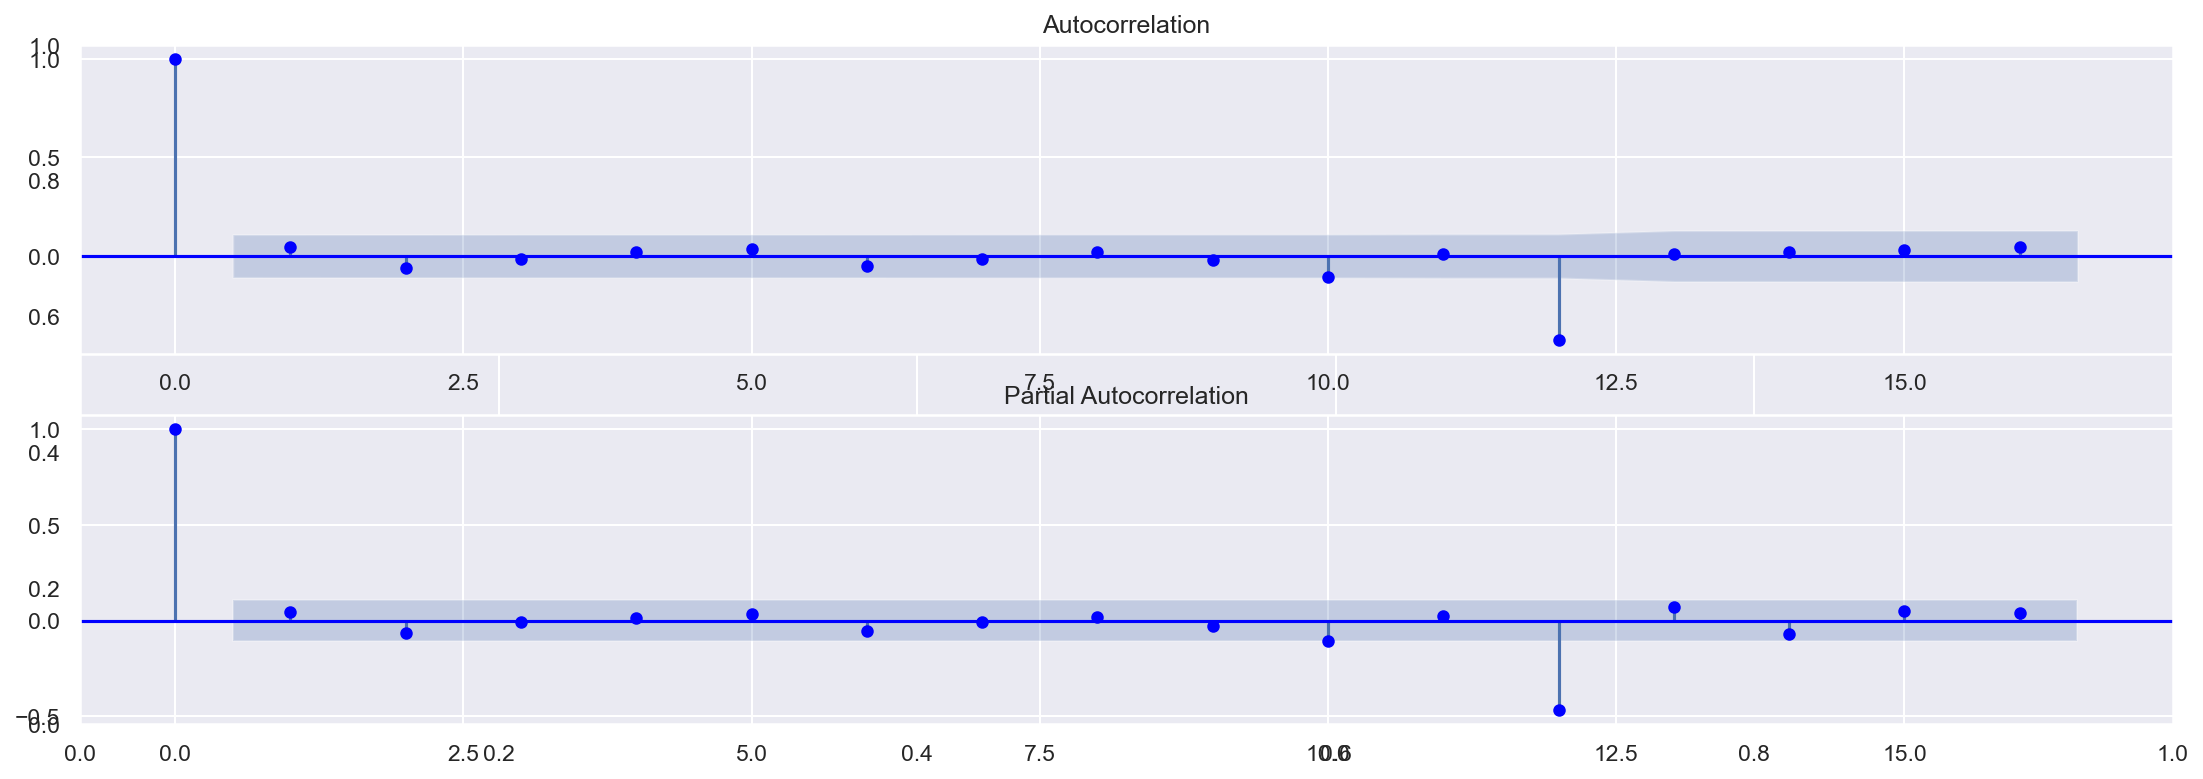

In [105]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(18,6))

ax = fig.add_subplot(211)
fig = plot_acf(border_crossing_monthly.stationary.dropna(), color = "blue", lags=16, ax=ax)

ax = fig.add_subplot(212)
fig = plot_pacf(border_crossing_monthly.stationary.dropna(), color = "blue", lags=16, ax=ax)

#plt.savefig('images/stochastic-acf-pacf.png');

We split our dataset into 80% for training and 20% of the remaining data for testing

In [114]:
split_index = int(border_crossing_monthly['date'].shape[0]*0.80)
train_data = border_crossing_monthly[:split_index]
test_data = border_crossing_monthly[split_index:]

#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace import sarimax

We fit the ARIMAX model

In [115]:
model = sarimax.SARIMAX(
    np.log(train_data.Value),
    trend='n', #identifies non-constant trend (other options: c for constant etc.)
    order=(1,1,1),
    seasonal_order=(1,1,1,12), #seasonal component
    enforce_stationarity=True,
    enforce_invertibility=True)

results = model.fit()
print(results.summary())

C:\Users\roman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\roman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  260
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 498.374
Date:                            Wed, 29 Mar 2023   AIC                           -986.749
Time:                                    16:26:53   BIC                           -969.202
Sample:                                01-01-1996   HQIC                          -979.684
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5805      0.148      3.924      0.000       0.291       0.871
ma.L1         -0.7428      0.123   

We get the predictions and evaluate our model

In [116]:
steps = test_data.shape[0]

forecast = results.get_forecast(steps=steps)
forecast_ci = forecast.conf_int()
yhat_test = np.exp(forecast.predicted_mean).values

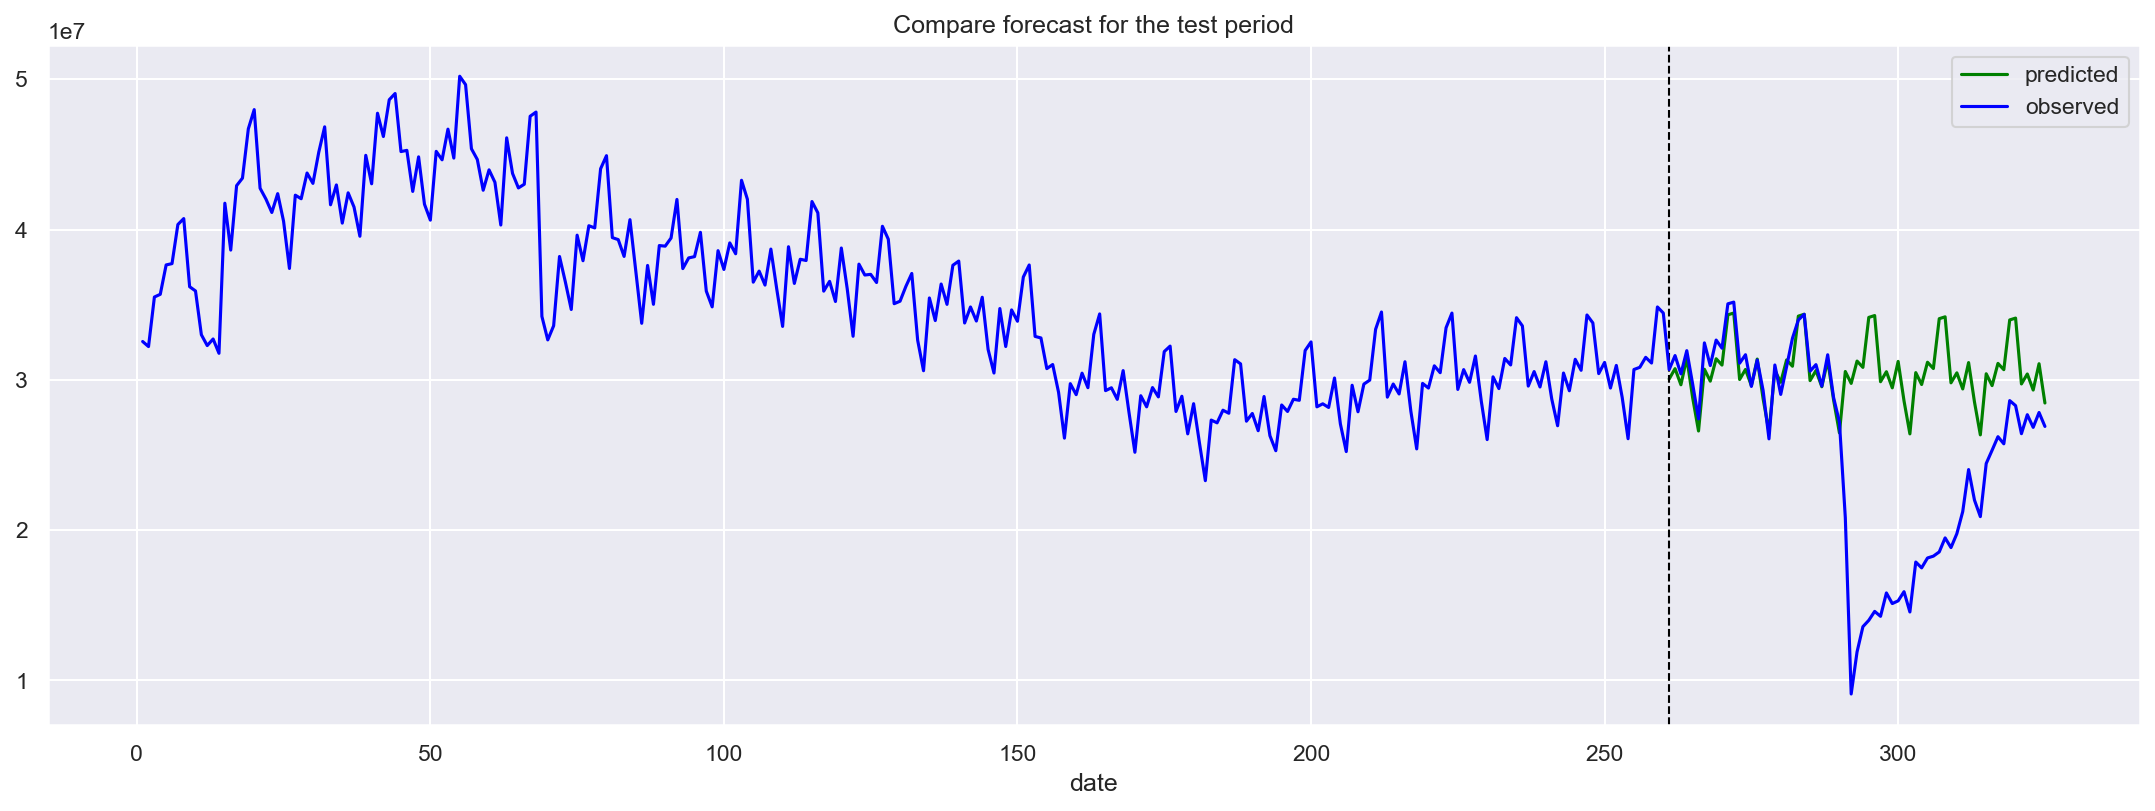

In [117]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(test_data.date.values, yhat_test,
        color="green", label="predicted")

plt.axvline(test_data.date.values[0], c='black', ls='--', lw=1)
border_crossing_monthly.plot(x="date", y="Value", color="blue", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Compare forecast for the test period')
plt.ylabel('')

#plt.savefig('images/stochastic-forecast-testrange.png')
plt.show();

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test_data.Value, yhat_test)
mse = mean_squared_error(test_data.Value, yhat_test)

print("MAE (test): {:0.1f}".format(mae))
print("MSE (test): {:0.1f}".format(mse))

MAE (test): 5942002.2
MSE (test): 76068212518593.2


In [119]:
mae = mean_absolute_error(test_data.Value[:12], yhat_test[:12])
mse = mean_squared_error(test_data.Value[:12], yhat_test[:12])

print("MAE (test): {:0.1f}".format(mae))
print("MSE (test): {:0.1f}".format(mse))

MAE (test): 920189.2
MSE (test): 951086779017.9


*** Conclusions ***

### 3. Are there any corrolations between historical events and the entry data?

*** Observations ***

### 4. Does the activity of the most used ports change over time?

<AxesSubplot:xlabel='Port Code', ylabel='Value'>

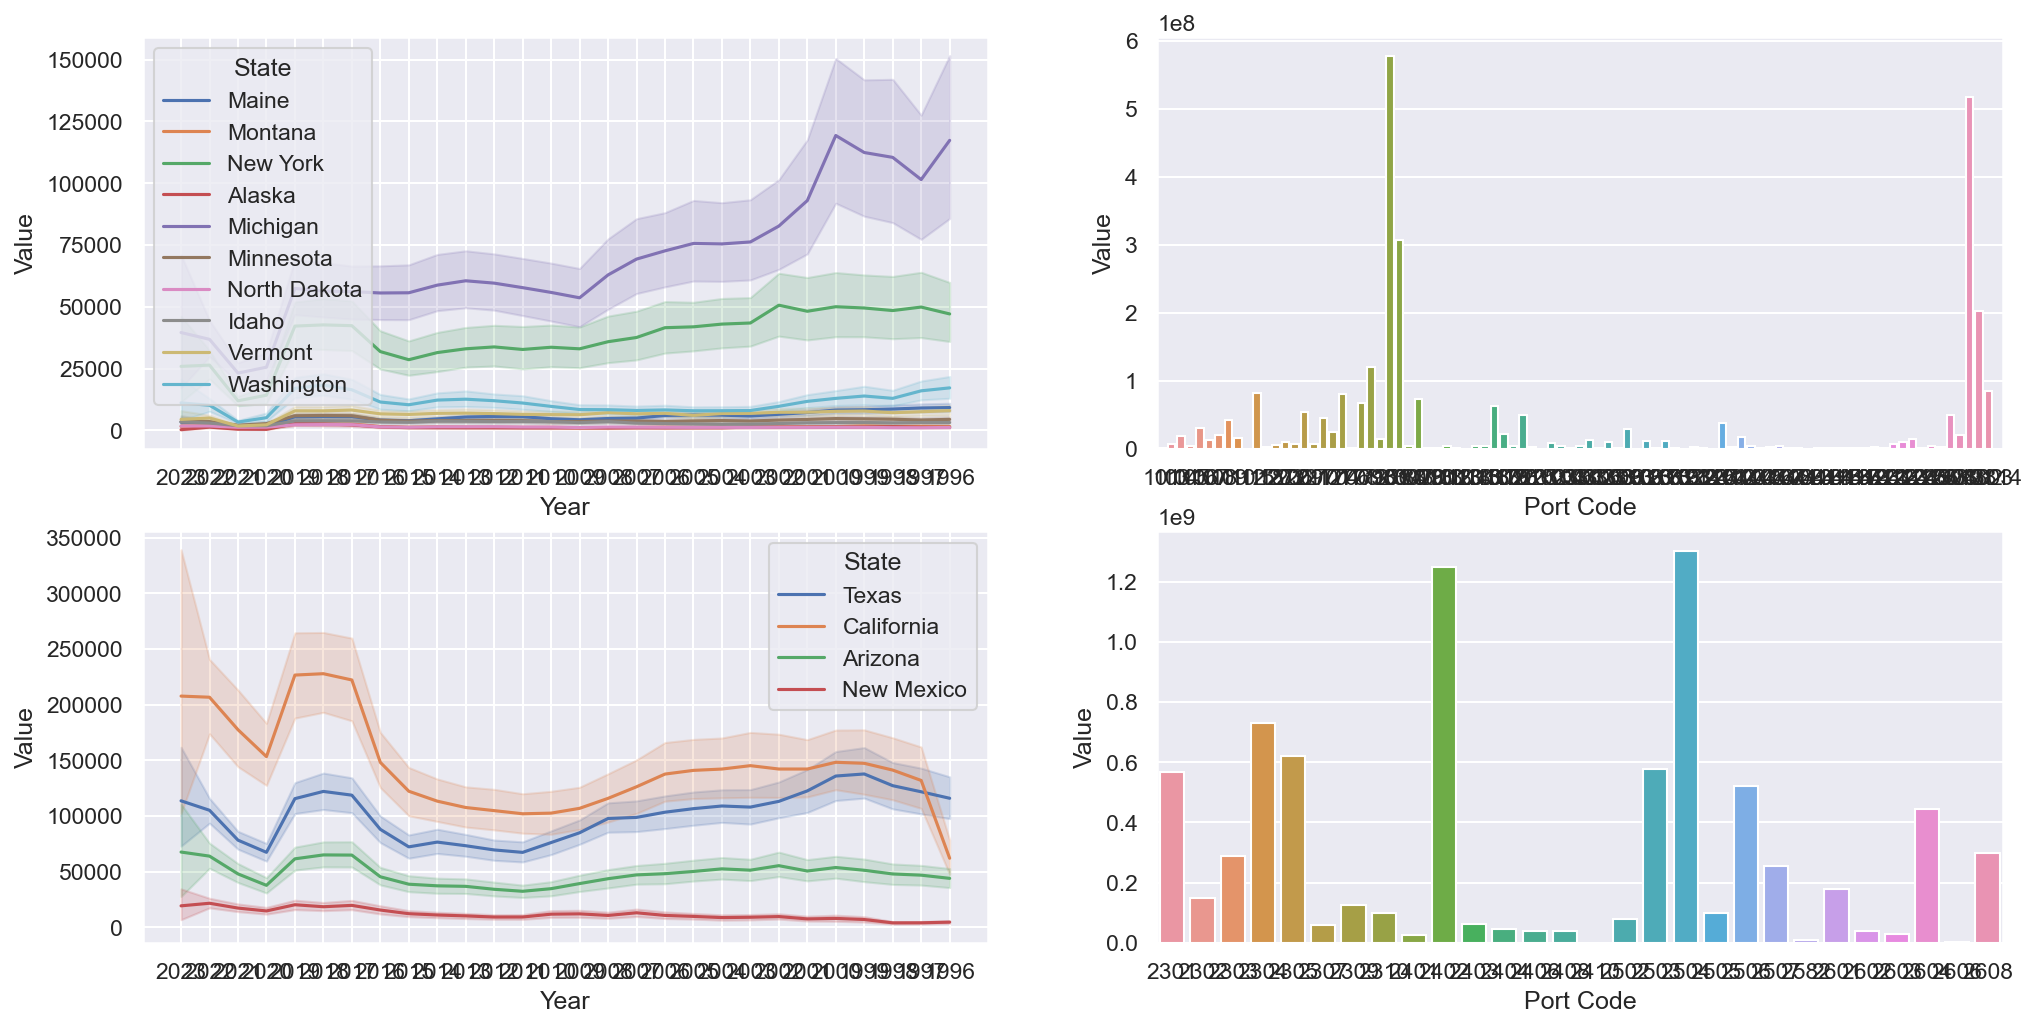

In [33]:
# To find most used find averages
figs, axss = plt.subplots(nrows=2,ncols=2)

portCan = canadacrossings[['State','Port Code','Value']].groupby(['State','Port Code']).agg(sum).reset_index(level=['Port Code'])
portMex = mexicocrossings[['State','Port Code','Value']].groupby(['State','Port Code']).agg(sum).reset_index(level=['Port Code'])

sns.lineplot(data=canadacrossings,x="Year",y="Value",hue="State",ax=axss[0,0])
sns.lineplot(data=mexicocrossings,x="Year",y="Value",hue="State",ax=axss[1,0])

sns.barplot(data=portCan,x="Port Code",y="Value",ax=axss[0,1])
sns.barplot(data=portMex,x="Port Code",y="Value",ax=axss[1,1])


The most used ports of entry were chosen by looking at the two most popular States and the top 5 most popular individual ports, respective to each country.

From the plots above we can see that the most popular ports in terms of states are:

Canada - Michigan, New York

Mexico - California, Texas

We can now find the most active individual ports.

In [34]:
### CODE HERE
# sumdf1 = canadacrossings[["Port Code","Value"]].copy()
# sumdf2 = mexicocrossings[["Port Code","Value"]].copy()

sumC1 = canadacrossings.loc[(canadacrossings['State'] >= "Michigan") & (canadacrossings['State'] <= "Michigan")]
sumC2 = canadacrossings.loc[(canadacrossings['State'] >= "New York") & (canadacrossings['State'] <= "New York")]
sumM1 = mexicocrossings.loc[(mexicocrossings['State'] >= "California") & (mexicocrossings['State'] <= "California")]
sumM2 = mexicocrossings.loc[(mexicocrossings['State'] >= "Texas") & (mexicocrossings['State'] <= "Texas")]
# aver.append(sumP1["Value"].sum())
print("The total entries from Canada: Michigan -",sumC1["Value"].sum(), " + New York -",sumC2["Value"].sum())
print("The total entries from Mexico: California -",sumM1["Value"].sum(), " + Texas -",sumM2["Value"].sum())

portCanSort = portCan.sort_values("Value",ascending=False)
portMexSort = portMex.sort_values("Value",ascending=False)
print("The popular ports from Canada: ", portCanSort.iat[0, 0]," ",portCanSort.iat[1, 0]," ",portCanSort.iat[2, 0]," ",portCanSort.iat[3, 0]," ", portCanSort.iat[4, 0])
print("The popular ports from Mexico: ", portMexSort.iat[0, 0]," ",portMexSort.iat[1, 0]," ",portMexSort.iat[2, 0]," ",portMexSort.iat[3, 0]," ", portMexSort.iat[4, 0])

The total entries from Canada: Michigan - 806049470  + New York - 884941822
The total entries from Mexico: California - 2845046807  + Texas - 4024501240
The popular ports from Canada:  901   3801   3004   3802   712
The popular ports from Mexico:  2504   2402   2304   2305   2503


We can now look at how the activity varies over time.

<AxesSubplot:xlabel='Year', ylabel='Value'>

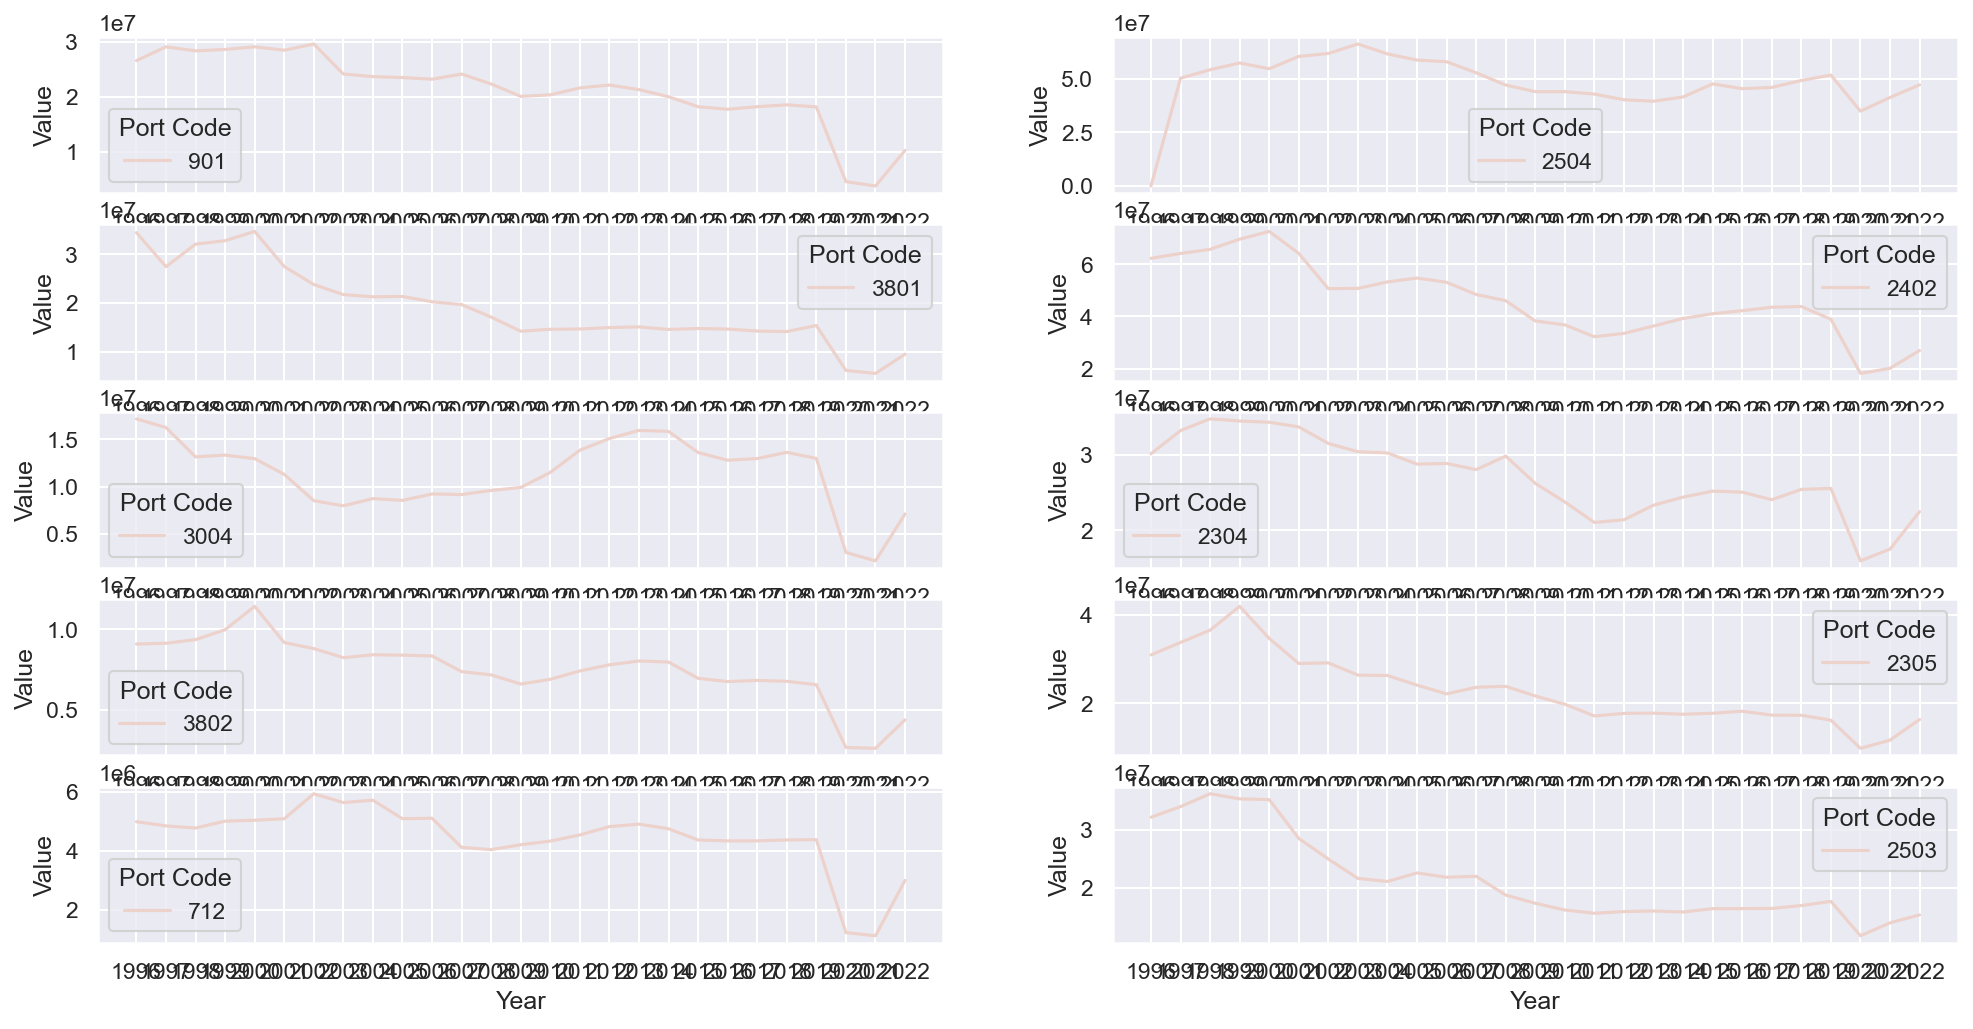

In [35]:
figss, axsss = plt.subplots(nrows=5,ncols=2)

tPortC = canadacrossings[['Year','Port Code','Value']].groupby(['Year','Port Code']).agg(sum).reset_index(level=['Port Code']).drop(index='2023')
tPortM = mexicocrossings[['Year','Port Code','Value']].groupby(['Year','Port Code']).agg(sum).reset_index(level=['Port Code']).drop(index='2023')

sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 901) & (tPortC['Port Code'] <= 901)],x="Year",y="Value",hue="Port Code",ax=axsss[0,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3801) & (tPortC['Port Code'] <= 3801)],x="Year",y="Value",hue="Port Code",ax=axsss[1,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3004) & (tPortC['Port Code'] <= 3004)],x="Year",y="Value",hue="Port Code",ax=axsss[2,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 3802) & (tPortC['Port Code'] <= 3802)],x="Year",y="Value",hue="Port Code",ax=axsss[3,0])
sns.lineplot(data=tPortC.loc[(tPortC['Port Code'] >= 712) & (tPortC['Port Code'] <= 712)],x="Year",y="Value",hue="Port Code",ax=axsss[4,0])

sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2504) & (tPortM['Port Code'] <= 2504)],x="Year",y="Value",hue="Port Code",ax=axsss[0,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2402) & (tPortM['Port Code'] <= 2402)],x="Year",y="Value",hue="Port Code",ax=axsss[1,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2304) & (tPortM['Port Code'] <= 2304)],x="Year",y="Value",hue="Port Code",ax=axsss[2,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2305) & (tPortM['Port Code'] <= 2305)],x="Year",y="Value",hue="Port Code",ax=axsss[3,1])
sns.lineplot(data=tPortM.loc[(tPortM['Port Code'] >= 2503) & (tPortM['Port Code'] <= 2503)],x="Year",y="Value",hue="Port Code",ax=axsss[4,1])

This can be represented as:

In [36]:
from IPython.display import Image
Image('C:/Users/Can/Desktop/dsai/DA/mappoints.png')

FileNotFoundError: No such file or directory: 'C:/Users/Can/Desktop/dsai/DA/mappoints.png'

FileNotFoundError: No such file or directory: 'C:/Users/Can/Desktop/dsai/DA/mappoints.png'

<IPython.core.display.Image object>

*** Observations Question 3 ***